# Classification using news-data

The plan in this notebook is to load the dataset from https://huggingface.co/datasets/okite97/news-data which is able to classify articles into politics/business/health/sports.

We are then loading the model from https://huggingface.co/elozano/bert-base-cased-news-category/tree/main and testing it on this dataset. The model is trained to score on politics/world/technology/science/automobile/entertainment/sports.

This will be scoring the model based specifically on it's ability to identify politics articles, though it will be interesting to also check the aggregate results.

## Installing Datasets and loading news-data

In [ ]:
# To get this to work, you need to uninstall transformers, huggingface-hub, and 

In [1]:
!pip install datasets


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [2]:
from datasets import load_dataset
from datasets import DatasetInfo

In [22]:
dataset = load_dataset("okite97/news-data", split='train')

In [24]:
dataset

Dataset({
    features: ['Title', 'Excerpt', 'Category'],
    num_rows: 4686
})

In [25]:
dataset[0]

{'Title': 'Uefa Opens Proceedings against Barcelona, Juventus and Real Madrid Over European Super League Plan',
 'Excerpt': 'Uefa has opened disciplinary proceedings against Barcelona, Juventus and Real Madrid over their involvement in the proposed European Super League.',
 'Category': 'sports'}

In [26]:
exists = []
count = []
for category in dataset['Category']:
    if category in exists:
        break
    else: 
        count.append([category, dataset['Category'].count(category)])
        exists.append(category)    

In [27]:
count

[['sports', 1124], ['business', 1268], ['politics', 1073], ['health', 550]]

# Importing the  bert-base-cased-news-category model

In [11]:
from tokenizers import Tokenizer
from transformers import pipeline

In [14]:
# installing a text-classification pipeline with our custom model

pipe = pipeline("text-classification", model="elozano/bert-base-cased-news-category")

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

/home/peter/.pyenv/versions/3.10.6/envs/lewagon_current/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/321 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [17]:
# testing the pipline on a specific phrase

pipe('Liberals are great!')

[{'label': 'World', 'score': 0.62265944480896}]

In [18]:
from transformers.pipelines.pt_utils import KeyDataset
from tqdm.auto import tqdm

In [30]:
# The KeyDataset object extracts the values from a specific key (here it's 'Exerpt') and leaves the result as a Dataset object

KeyDataset(dataset, "Excerpt")

In [36]:
import pandas as pd

In [38]:
# creating a dataframe for scoring

df = dataset.to_pandas()

In [45]:
df['model_pred'] = 0
df['model_conf'] = 0

In [48]:
df

,Title,Excerpt,Category,model_pred,model_conf
0,"Uefa Opens Proceedings against Barcelona, Juve...",Uefa has opened disciplinary proceedings again...,sports,0,0
1,Amazon Blames Inflation as It Increases Cost o...,The increases are steeper than the 17 percent ...,business,0,0
2,Nigeria’s Parliament Passes Amended Electoral ...,Nigeria's Senate on Tuesday passed the harmoni...,politics,0,0
3,Nigeria: Lagos Governor Tests Positive for Cov...,"The Lagos State Governor, Mr. Babajide Sanwo-O...",health,0,0
4,South Africa Calls For Calm as Electoral Refor...,South Africa has raised concerns about the det...,politics,0,0
...,...,...,...,...,...
4681,Uganda Drops Charges Against Nigerian Singers ...,Nigerian singers Omah Lay and Tems are set to ...,entertainment,0,0
4682,NNPC Cuts Directors’ Fees by 60.2%,The Nigerian National Petroleum Corporation (N...,business,0,0
4683,Nigeria’s External Reserves Hit $37bn with $3....,Nigeria’s foreign reserves will get a timely b...,business,0,0
4684,Transcorp Hilton Wins Africa’s Leading Busines...,Transcorp Hilton Abuja has been honoured with ...,business,0,0


In [56]:
# Running the model on our dataset to test it's accuracy 

for i, out in enumerate(tqdm(pipe(KeyDataset(dataset, 'Excerpt')))):

    df.loc[i, 'model_pred'] = out['label']
    df.loc[i, 'model_conf'] = out['score']


  0%|          | 0/4686 [00:00<?, ?it/s]

In [58]:
df['model_pred'].value_counts()

World            2202
Sports           1052
Technology        665
Entertainment     255
Science           243
Politics          184
Automobile         85
Name: model_pred, dtype: int64

In [59]:
df['model_pred'] = df['model_pred'].str.lower()

In [62]:
df

,Title,Excerpt,Category,model_pred,model_conf
0,"Uefa Opens Proceedings against Barcelona, Juve...",Uefa has opened disciplinary proceedings again...,sports,sports,0.985748
1,Amazon Blames Inflation as It Increases Cost o...,The increases are steeper than the 17 percent ...,business,world,0.308457
2,Nigeria’s Parliament Passes Amended Electoral ...,Nigeria's Senate on Tuesday passed the harmoni...,politics,world,0.993005
3,Nigeria: Lagos Governor Tests Positive for Cov...,"The Lagos State Governor, Mr. Babajide Sanwo-O...",health,world,0.942480
4,South Africa Calls For Calm as Electoral Refor...,South Africa has raised concerns about the det...,politics,world,0.995398
...,...,...,...,...,...
4681,Uganda Drops Charges Against Nigerian Singers ...,Nigerian singers Omah Lay and Tems are set to ...,entertainment,world,0.837737
4682,NNPC Cuts Directors’ Fees by 60.2%,The Nigerian National Petroleum Corporation (N...,business,world,0.961642
4683,Nigeria’s External Reserves Hit $37bn with $3....,Nigeria’s foreign reserves will get a timely b...,business,world,0.995204
4684,Transcorp Hilton Wins Africa’s Leading Busines...,Transcorp Hilton Abuja has been honoured with ...,business,world,0.497230


In [63]:
a = df['Category'] == 'politics' 
b = df['model_pred'] == 'politics'

In [64]:
politics_df = df[a|b]

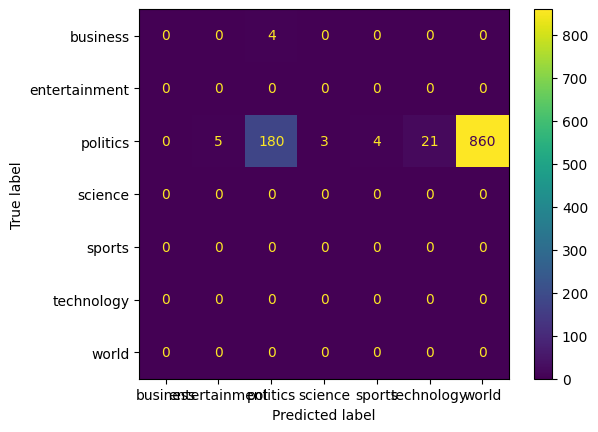

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(politics_df['Category'], politics_df['model_pred'])
disp

In [71]:
!ls

article_classification.ipynb  data  README.md


# Saving models first attempt

In [70]:
df.to_csv('data/modelbbcnc)

,Title,Excerpt,Category,model_pred,model_conf
0,"Uefa Opens Proceedings against Barcelona, Juve...",Uefa has opened disciplinary proceedings again...,sports,sports,0.985748
1,Amazon Blames Inflation as It Increases Cost o...,The increases are steeper than the 17 percent ...,business,world,0.308457
2,Nigeria’s Parliament Passes Amended Electoral ...,Nigeria's Senate on Tuesday passed the harmoni...,politics,world,0.993005
3,Nigeria: Lagos Governor Tests Positive for Cov...,"The Lagos State Governor, Mr. Babajide Sanwo-O...",health,world,0.942480
4,South Africa Calls For Calm as Electoral Refor...,South Africa has raised concerns about the det...,politics,world,0.995398
...,...,...,...,...,...
4681,Uganda Drops Charges Against Nigerian Singers ...,Nigerian singers Omah Lay and Tems are set to ...,entertainment,world,0.837737
4682,NNPC Cuts Directors’ Fees by 60.2%,The Nigerian National Petroleum Corporation (N...,business,world,0.961642
4683,Nigeria’s External Reserves Hit $37bn with $3....,Nigeria’s foreign reserves will get a timely b...,business,world,0.995204
4684,Transcorp Hilton Wins Africa’s Leading Busines...,Transcorp Hilton Abuja has been honoured with ...,business,world,0.497230
